# US Obesity Rate by Income in 2014
- This notebook will explore obesity rates of 6 income groups. 
    - less than $15,000
    
    - $15,000 - $24,999
    
    - $25,000 - $34,999
    
    - $35,000 - $49,999
    
    - $50,000 - $74,999
    
    - $75,000 or greater
- First, the notebook will calculate the national obesity rate 
- Second, the notebook will calculate the average national obesity rate per income group. 
- Third, the notebook will show a graph comparing the national obesity rates per income group
- The purpose of this notebook is to show what income group had the highest and lowest obesity rate in 2014

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np

# Load & Inspect 2014 Obesity by Income Data Frame

In [2]:
obesity_in_US_income_2014 = pd.read_csv('../data/Clean Data/obesity_in_US_income_2014.csv')

In [3]:
obesity_in_US_income_2014

,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,0,2014,AL,Alabama,34.5,34.5,Percent of adults aged 18 years and older who ...,1108.0,NaN,"Less than $15,000","(32.84057112200048, -86.63186076199969)",1,Income,"Less than $15,000"
1,1,2014,AL,Alabama,40.6,40.6,Percent of adults aged 18 years and older who ...,1406.0,NaN,"$15,000 - $24,999","(32.84057112200048, -86.63186076199969)",1,Income,"$15,000 - $24,999"
2,2,2014,AL,Alabama,35.4,35.4,Percent of adults aged 18 years and older who ...,776.0,NaN,"$25,000 - $34,999","(32.84057112200048, -86.63186076199969)",1,Income,"$25,000 - $34,999"
3,3,2014,AL,Alabama,35.5,35.5,Percent of adults aged 18 years and older who ...,986.0,NaN,"$35,000 - $49,999","(32.84057112200048, -86.63186076199969)",1,Income,"$35,000 - $49,999"
4,4,2014,AL,Alabama,32.4,32.4,Percent of adults aged 18 years and older who ...,959.0,NaN,"$50,000 - $74,999","(32.84057112200048, -86.63186076199969)",1,Income,"$50,000 - $74,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,751,2014,WY,Wyoming,31.7,31.7,Percent of adults aged 18 years and older who ...,599.0,NaN,"$25,000 - $34,999","(43.23554134300048, -108.10983035299967)",56,Income,"$25,000 - $34,999"
752,752,2014,WY,Wyoming,32.8,32.8,Percent of adults aged 18 years and older who ...,768.0,NaN,"$35,000 - $49,999","(43.23554134300048, -108.10983035299967)",56,Income,"$35,000 - $49,999"
753,753,2014,WY,Wyoming,39.7,39.7,Percent of adults aged 18 years and older who ...,898.0,NaN,"$50,000 - $74,999","(43.23554134300048, -108.10983035299967)",56,Income,"$50,000 - $74,999"
754,754,2014,WY,Wyoming,38.8,38.8,Percent of adults aged 18 years and older who ...,1498.0,NaN,"$75,000 or greater","(43.23554134300048, -108.10983035299967)",56,Income,"$75,000 or greater"


In [4]:
obesity_in_US_income_2014['Income'].unique()

array(['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater',
       'Data not reported'], dtype=object)

In [5]:
obesity_in_US_income_2014['Income'].value_counts()

$50,000 - $74,999     108
$35,000 - $49,999     108
$75,000 or greater    108
Less than $15,000     108
Data not reported     108
$25,000 - $34,999     108
$15,000 - $24,999     108
Name: Income, dtype: int64

In [6]:
# drop 'data not reported'
obesity_in_US_income_2014=obesity_in_US_income_2014[~(obesity_in_US_income_2014['Income']=='Data not reported')]
obesity_in_US_income_2014['Income'].unique()


array(['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater'],
      dtype=object)

In [7]:
# save data frame
obesity_in_US_income_2014 = obesity_in_US_income_2014.reset_index(drop = True)

# Questions: 
#### Question 1: What was the national obesity rate in 2014?
- Steps:
    - make national its own data frame named "income_obesity_in_US_national_2014_df"
    - Create a filter "national_avg_2014" to find the mean obesity rate nationally
    - Use "national_avg_2014" filter to show the national obesity rate average on chart


#### Question 2: What was the obesity rate for people with income of less than 15,000 in 2014?
- Steps: 
    - create filter named "income_less_than_15000_in_2014_national"
    - create filter named "income_less_than_15000_in_2014_national_avg" to calculate average obesity rate for         income of less than 15,000 in 2014
    - Use "income_less_than_15000_in_2014_national_avg" filter to show the national obesity rate average for         income of less than 15000 on chart

#### Question 3: What was the national obesity rate for income of 15,000 - 24,999 in 2014?
- Steps: 
    - create filter named "income_15000_24999_in_2014_national"
    - create filter named "income_15000_24999_in_2014_national_avg" to calculate average obesity rate for             income of 15,000 - 24,999 in 2014
    - Use "income_15000_24999_in_2014_national_avg" filter to show the national obesity rate average for             income of 15,000 - 24,999 on chart

#### Question 4: What was the national obesity rate for income of 25,000 - 34,999  in 2014?
- Steps: 
    - create filter named "income_25,000_34,999_in_2014_national"
    - create filter named "income_25,000_34,999_in_2014_national_avg" to calculate average obesity rate for             income of 25,000 - 34,999  in 2014
    - Use "income_25,000_34,999_in_2014_national_avg" filter to show the national obesity rate average for             income of 25,000 - 34,999  on chart
    
#### Question 5: What was the national obesity rate for income of 35,000 - 49,999  in 2014?
- Steps: 
    - create filter named "income_35000_49999_in_2014_national"
    - create filter named "income_35000_49999_in_2014_national_avg" to calculate average obesity rate for             income of 35,000 - 49,999  in 2014
    - Use "income_35000_49999_in_2014_national_avg" filter to show the national obesity rate average for             income of 35,000 - 49,999  on chart
    
#### Question 6: What is the obesity rate for income of 50,000 - 74,999 in 2014?
- Steps: 
    - create filter named "income_50000_74999_in_2014_national"
    - create filter named "income_50000_74999_in_2014_national_avg" to calculate average obesity rate for             income of 50,000 - 74,999  in 2014
    - Use "income_50000_74999_in_2014_national_avg" filter to show the national obesity rate average for             income of 50,000 - 74,999  on chart

#### Question 7: What is the obesity rate for income of 75,000 or greater in 2014?¶
- Steps: 
    - create filter named "income_75000_greater_in_2014_national"
    - create filter named "income_75000_greater_in_2014_national_avg" to calculate average obesity rate for             income of 75,000 or greater  in 2014
    - Use "income_75000_greater_in_2014_national_avg" filter to show the national obesity rate average for             income of 75,000 or greater  on chart
    
#### Question 8: National Obesity Rates by Income in 2014
- Steps: 
    - create filter named "combined_df_income_2014" to bring all the national obesity rates per age group             together 
    - plot a graph of the age groups obesity rates



# Question 1: What was the national obesity rate in 2014?

In [8]:
#Income
#make national its own data frame named "income_obesity_in_US_national_2014_df"
income_obesity_in_US_national_2014_df=obesity_in_US_income_2014[(obesity_in_US_income_2014['state_name']=='National')]
income_obesity_in_US_national_2014_df

,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
336,392,2014,US,National,35.2,35.2,Percent of adults aged 18 years and older who ...,39123.0,NaN,"Less than $15,000",NaN,59,Income,"Less than $15,000"
337,393,2014,US,National,32.2,32.2,Percent of adults aged 18 years and older who ...,62892.0,NaN,"$15,000 - $24,999",NaN,59,Income,"$15,000 - $24,999"
338,394,2014,US,National,31.1,31.1,Percent of adults aged 18 years and older who ...,41727.0,NaN,"$25,000 - $34,999",NaN,59,Income,"$25,000 - $34,999"
339,395,2014,US,National,30.7,30.7,Percent of adults aged 18 years and older who ...,54340.0,NaN,"$35,000 - $49,999",NaN,59,Income,"$35,000 - $49,999"
340,396,2014,US,National,29.2,29.2,Percent of adults aged 18 years and older who ...,59297.0,NaN,"$50,000 - $74,999",NaN,59,Income,"$50,000 - $74,999"
341,397,2014,US,National,25.1,25.1,Percent of adults aged 18 years and older who ...,112498.0,NaN,"$75,000 or greater",NaN,59,Income,"$75,000 or greater"
342,399,2014,US,National,30.4,30.4,Percent of adults aged 18 years and older who ...,39123.0,NaN,"Less than $15,000",NaN,59,Income,"Less than $15,000"
343,400,2014,US,National,33.2,33.2,Percent of adults aged 18 years and older who ...,62892.0,NaN,"$15,000 - $24,999",NaN,59,Income,"$15,000 - $24,999"
344,401,2014,US,National,36.0,36.0,Percent of adults aged 18 years and older who ...,41727.0,NaN,"$25,000 - $34,999",NaN,59,Income,"$25,000 - $34,999"
345,402,2014,US,National,36.5,36.5,Percent of adults aged 18 years and older who ...,54340.0,NaN,"$35,000 - $49,999",NaN,59,Income,"$35,000 - $49,999"


- "income_obesity_in_US_national_2014_df"
    - this data frame represents the country as a whole by age (it eliminates the state by state averages) in 2014
    - use it to calculate national obesity rate as 1) a whole, 2) for each age group 

In [9]:
income_obesity_in_US_national_2014_df['Income'].value_counts()

$75,000 or greater    2
$15,000 - $24,999     2
$35,000 - $49,999     2
$25,000 - $34,999     2
$50,000 - $74,999     2
Less than $15,000     2
Name: Income, dtype: int64

In [10]:
# Create a filter "national_avg_2014" to find the mean obesity rate nationally
national_avg_2014=income_obesity_in_US_national_2014_df['income_pc'].mean()
national_avg_2014


32.86666666666667

#### Note: This is unnecessary to include in story but it is good to know that it is the same average as national gender because it shows that this data is accurate throughout

In [11]:
# Use "national_avg_2014" filter to show the national obesity rate average on chart
national_avg_2014=income_obesity_in_US_national_2014_df.groupby('state_name')['income_pc'].mean()
national_avg_2014
title1='The national obesity rate average in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(national_avg_2014.sort_values())





The national obesity rate average in 2014
state_name
National    32.866667
Name: income_pc, dtype: float64


### Answer: The national obesity rate average in 2014 was 32.9%

Text(0.5, 1.0, '2014')

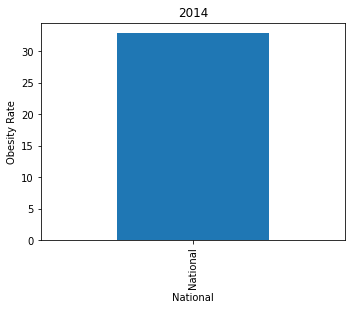

In [12]:

# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))

# 2. the plt.subplot() function divides the main figure into rows and columns
#    121 = 1 row 2 columns and the first slot
plt.subplot(121)

# use the region mean data to plot a bar chart and add labels
national_avg_2014.plot(kind='bar')
plt.xlabel('National')
plt.ylabel('Obesity Rate')
plt.title('2014')


# Question 2: What was the national obesity rate for people with income of less than     $15,000 in 2014?

In [13]:
# create filter named "income_less_than_15000_in_2014_national"
income_less_than_15000_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='Less than $15,000')]
income_less_than_15000_in_2014_national


,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
336,392,2014,US,National,35.2,35.2,Percent of adults aged 18 years and older who ...,39123.0,NaN,"Less than $15,000",NaN,59,Income,"Less than $15,000"
342,399,2014,US,National,30.4,30.4,Percent of adults aged 18 years and older who ...,39123.0,NaN,"Less than $15,000",NaN,59,Income,"Less than $15,000"


In [14]:
# create filter named "income_less_than_15000_in_2014_national_avg" to calculate average obesity rate for income of less than $15,000 in 2014
income_less_than_15000_in_2014_national_avg=income_less_than_15000_in_2014_national['income_pc'].mean()
income_less_than_15000_in_2014_national_avg


32.8

In [15]:
# Use "income_less_than_15000_in_2014_national_avg" filter to show the national obesity rate average for income of less than $15000 on chart
income_less_than_15000_in_2014_national_avg=income_less_than_15000_in_2014_national.groupby('Income')['income_pc'].mean()
income_less_than_15000_in_2014_national_avg
title1='The national obesity rate average for income of less than $15,000 in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_less_than_15000_in_2014_national_avg.sort_values())



The national obesity rate average for income of less than $15,000 in 2014
Income
Less than $15,000    32.8
Name: income_pc, dtype: float64


### Answer: On a national scale, 32.8% of adults with income of less than $15000 were obese in 2014. 

# Question 3: What was the national obesity rate for income of $15,000 - $24,999 in 2014?

In [16]:
# create filter named "income_15000_24999_in_2014_national"
income_15000_24999_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='$15,000 - $24,999')]
income_15000_24999_in_2014_national


,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
337,393,2014,US,National,32.2,32.2,Percent of adults aged 18 years and older who ...,62892.0,NaN,"$15,000 - $24,999",NaN,59,Income,"$15,000 - $24,999"
343,400,2014,US,National,33.2,33.2,Percent of adults aged 18 years and older who ...,62892.0,NaN,"$15,000 - $24,999",NaN,59,Income,"$15,000 - $24,999"


In [17]:
# create filter named "income_15000_24999_in_2014_national_avg" to calculate average obesity rate for income of 15,000 to 24,999 in 2014

income_15000_24999_in_2014_national_avg=income_15000_24999_in_2014_national['income_pc'].mean()
income_15000_24999_in_2014_national_avg


32.7

In [18]:
# Use "income_15000_24999_in_2014_national_avg" filter to show the national obesity rate average for income of 15,000−24,999  on chart
income_15000_24999_in_2014_national_avg=income_15000_24999_in_2014_national.groupby('Income')['income_pc'].mean()
income_15000_24999_in_2014_national_avg
title1='The national obesity rate average for income of $15,000 to $24,999 in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_15000_24999_in_2014_national_avg.sort_values())



The national obesity rate average for income of $15,000 to $24,999 in 2014
Income
$15,000 - $24,999    32.7
Name: income_pc, dtype: float64


### Answer:  On a national scale, 32.7% of adults with an income between $15,000 to $24,999 were obese in 2014. 

# Question 4: What was the national obesity rate for income of $25,000 - $34,999  in 2014?

In [19]:
# create filter named "income_25000_34999_in_2014_national"
income_25000_34999_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='$25,000 - $34,999')]
income_25000_34999_in_2014_national


,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
338,394,2014,US,National,31.1,31.1,Percent of adults aged 18 years and older who ...,41727.0,NaN,"$25,000 - $34,999",NaN,59,Income,"$25,000 - $34,999"
344,401,2014,US,National,36.0,36.0,Percent of adults aged 18 years and older who ...,41727.0,NaN,"$25,000 - $34,999",NaN,59,Income,"$25,000 - $34,999"


In [20]:
# create filter named "income_25000_34999_in_2014_national_avg" to calculate average obesity rate for income of 25,000 to 34,999 in 2014

income_25000_34999_in_2014_national_avg=income_25000_34999_in_2014_national['income_pc'].mean()
income_25000_34999_in_2014_national_avg

33.55

In [21]:
# Use "income_25000_34999_in_2014_national_avg" filter to show the national obesity rate average for income $25,000 to $34,999 on chart
income_25000_34999_in_2014_national_avg=income_25000_34999_in_2014_national.groupby('Income')['income_pc'].mean()
income_25000_34999_in_2014_national_avg
title1='The national obesity rate average for income of $25,000 to $34,999 in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_25000_34999_in_2014_national_avg.sort_values())


The national obesity rate average for income of $25,000 to $34,999 in 2014
Income
$25,000 - $34,999    33.55
Name: income_pc, dtype: float64


### Answer:  On a national scale, 33.6% of adults with an income of $25,000 to $34,999 were obese in 2014. 

# Question 5: What was the national obesity rate for income of $35,000 - $49,999  in 2014?

In [22]:
# create filter named "income_35000_49999_in_2014_national"
income_35000_49999_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='$35,000 - $49,999')]
income_35000_49999_in_2014_national



,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
339,395,2014,US,National,30.7,30.7,Percent of adults aged 18 years and older who ...,54340.0,NaN,"$35,000 - $49,999",NaN,59,Income,"$35,000 - $49,999"
345,402,2014,US,National,36.5,36.5,Percent of adults aged 18 years and older who ...,54340.0,NaN,"$35,000 - $49,999",NaN,59,Income,"$35,000 - $49,999"


In [23]:
# create filter named "income_35000_49999_in_2014_national_avg" to calculate average obesity rate for income of 35,000 to 49,999 in 2014

income_35000_49999_in_2014_national_avg=income_35000_49999_in_2014_national['income_pc'].mean()
income_35000_49999_in_2014_national_avg


33.6

In [24]:
# Use "income_35000_49999_in_2014_national_avg" filter to show the national ages 55-64 obesity rate average on chart
income_35000_49999_in_2014_national_avg=income_35000_49999_in_2014_national.groupby('Income')['income_pc'].mean()
income_35000_49999_in_2014_national_avg
title1='The national obesity rate average for income of $35,000 to $49,999 in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_35000_49999_in_2014_national_avg.sort_values())


The national obesity rate average for income of $35,000 to $49,999 in 2014
Income
$35,000 - $49,999    33.6
Name: income_pc, dtype: float64


### Answer:  On a national scale, 33.6% of adults with income of $35,000 to $49,999 were obese in 2014. 

# Question 6: What is the obesity rate for income of $50,000 - $74,999  in 2014?

In [25]:
# create filter named "income_50000_74999_in_2014_national"
income_50000_74999_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='$50,000 - $74,999')]
income_50000_74999_in_2014_national


,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
340,396,2014,US,National,29.2,29.2,Percent of adults aged 18 years and older who ...,59297.0,NaN,"$50,000 - $74,999",NaN,59,Income,"$50,000 - $74,999"
346,403,2014,US,National,37.2,37.2,Percent of adults aged 18 years and older who ...,59297.0,NaN,"$50,000 - $74,999",NaN,59,Income,"$50,000 - $74,999"


In [26]:
# create filter named "income_50000_74999_in_2014_national_avg" to calculate average obesity rate for income of 50,000 to 74,999 in 2014

income_50000_74999_in_2014_national_avg=income_50000_74999_in_2014_national['income_pc'].mean()
income_50000_74999_in_2014_national_avg

33.2

In [27]:
# Use "income_50000_74999_in_2014_national_avg" filter to show the national obesity rate average of people with income of $50,000 - $74,999 on chart
income_50000_74999_in_2014_national_avg=income_50000_74999_in_2014_national.groupby('Income')['income_pc'].mean()
income_50000_74999_in_2014_national_avg
title1='The national obesity rate average for income of $50,000 - $74,999 in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_50000_74999_in_2014_national_avg.sort_values())


The national obesity rate average for income of $50,000 - $74,999 in 2014
Income
$50,000 - $74,999    33.2
Name: income_pc, dtype: float64


### Answer:  On a national scale, 33.2% of adults with an income of $50,000 - $74,999 were obese in 2014. 

# Question 7: What is the obesity rate for income of $75,000 or greater in 2014?

In [28]:
# create filter named "income_75000_greater_in_2014_national"
income_75000_greater_in_2014_national=income_obesity_in_US_national_2014_df[(income_obesity_in_US_national_2014_df['Income']=='$75,000 or greater')]
income_75000_greater_in_2014_national


,Unnamed: 0,year,state,state_name,income_pc,Data_Value_Alt,Question,Sample_Size,Total,Income,GeoLocation,LocationID,StratificationCategory1,Stratification1
341,397,2014,US,National,25.1,25.1,Percent of adults aged 18 years and older who ...,112498.0,NaN,"$75,000 or greater",NaN,59,Income,"$75,000 or greater"
347,404,2014,US,National,37.6,37.6,Percent of adults aged 18 years and older who ...,112498.0,NaN,"$75,000 or greater",NaN,59,Income,"$75,000 or greater"


In [29]:
# create filter named "income_75000_greater_in_2014_national_avg" to calculate average obesity rate for income of 75,000 or greater in 2014
income_75000_greater_in_2014_national_avg=income_75000_greater_in_2014_national['income_pc'].mean()
income_75000_greater_in_2014_national_avg

31.35

In [30]:
# Use "income_75000_greater_in_2014_national_avg" filter to show the national obesity rate average of people with income of $75,000 or greater on chart
income_75000_greater_in_2014_national_avg=income_75000_greater_in_2014_national.groupby('Income')['income_pc'].mean()
income_75000_greater_in_2014_national_avg
title1='The national obesity rate average for income of $75,000 or greater in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(income_75000_greater_in_2014_national_avg.sort_values())


The national obesity rate average for income of $75,000 or greater in 2014
Income
$75,000 or greater    31.35
Name: income_pc, dtype: float64


### Answer:  On a national scale, 31.35% of adults with an income of $75,000 or greater were obese in 2014.

In [31]:
list_of_2014_income_obesity = [income_15000_24999_in_2014_national,
               income_25000_34999_in_2014_national_avg,
               income_35000_49999_in_2014_national_avg,
               income_50000_74999_in_2014_national_avg,
               income_75000_greater_in_2014_national_avg]

combined_income_obesity = pd.concat(list_of_2014_income_obesity)

In [32]:
combined_income_obesity.groupby('year')['income_pc'].mean()

year
2014.0    32.7
Name: income_pc, dtype: float64

<AxesSubplot:xlabel='year'>

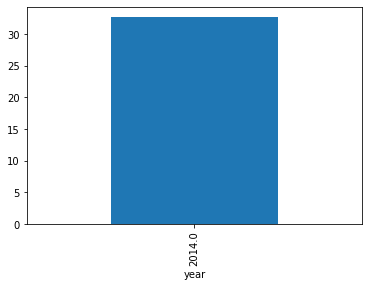

In [33]:
combined_income_obesity.groupby('year')['income_pc'].mean().plot(kind='bar')

# Question 8: National Obesity Rates by Income in 2014

In [34]:
list_of_dfs = [income_less_than_15000_in_2014_national_avg,
               income_15000_24999_in_2014_national_avg,
               income_25000_34999_in_2014_national_avg,
               income_35000_49999_in_2014_national_avg,
               income_50000_74999_in_2014_national_avg,
               income_75000_greater_in_2014_national_avg]

combined_df_income_2014 = pd.concat(list_of_dfs)

<AxesSubplot:xlabel='Income'>

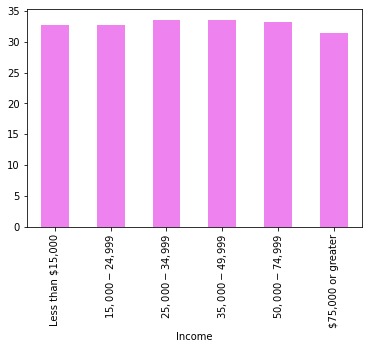

In [35]:
combined_df_income_2014.plot(kind='bar', color='violet')

People who make an income of $25000-$49,999 are the most obese in 2014

# Conclusion
- The national obesity rate average in 2014 was 32.9%
- On a national scale, 32.8% of adults with income of less than 15,000 were obese in 2014
- On a national scale, 32.7% of adults with an income between 15,000 to 24,999 in 2014
- On a national scale, 33.6% of adults with an income of 25,000 to 34,999 in 2014
- On a national scale, 33.6% of adults with income of  35,000 to 49,999 in 2014
- On a national scale, 33.2% of adults with an income of  50,000 − 74,999 in 2014
- On a national scale, 31.35% of adults with an income of 75,000 or greater were obese in 2014.
